In [9]:
import pandas as pd
import plotly.express as px

# Entropy Analysis

In [5]:
df = pd.read_csv("./results/entropy.csv", index_col=0)

In [6]:
df.head()

,prompt_index,prompt_start,entropies.0,entropies.1,entropies.2,entropies.5,entropies.10,entropies.15,entropies.20,entropies.24,entropies.25
0,0,James and his mom were walking to the park one...,0.002841,0.012692,0.013692,0.106909,0.810335,1.156944,0.453167,0.303021,0.929745
1,1,Once there was a little girl. She liked to put...,0.004980,0.005868,0.033454,0.130812,0.568140,0.974174,0.398959,0.390052,1.061851
2,2,Ben and Mia are twins. They like to play with ...,0.004665,0.009815,0.031804,0.149576,0.656617,1.062842,0.377453,0.305333,0.915309
3,3,Once upon a time there was an otter named Timm...,0.000275,0.004558,0.009065,0.160516,0.632366,0.903056,0.362114,0.331046,0.837523
4,4,Bella was a human and she liked to play with h...,0.000641,0.005041,0.004832,0.075883,0.576406,0.965831,0.365723,0.354434,1.049568


In [7]:
entropy_cols = df.filter(like='entropies.')
average_entropy_by_layer = entropy_cols.mean()

In [8]:
print(average_entropy_by_layer)

entropies.0     0.002852
entropies.1     0.007897
entropies.2     0.017692
entropies.5     0.122663
entropies.10    0.613727
entropies.15    0.989749
entropies.20    0.402973
entropies.24    0.325710
entropies.25    0.919672
dtype: float64


In [10]:
x_labels = [int(col.split('.')[-1]) for col in average_entropy_by_layer.index]
y_values = average_entropy_by_layer.values

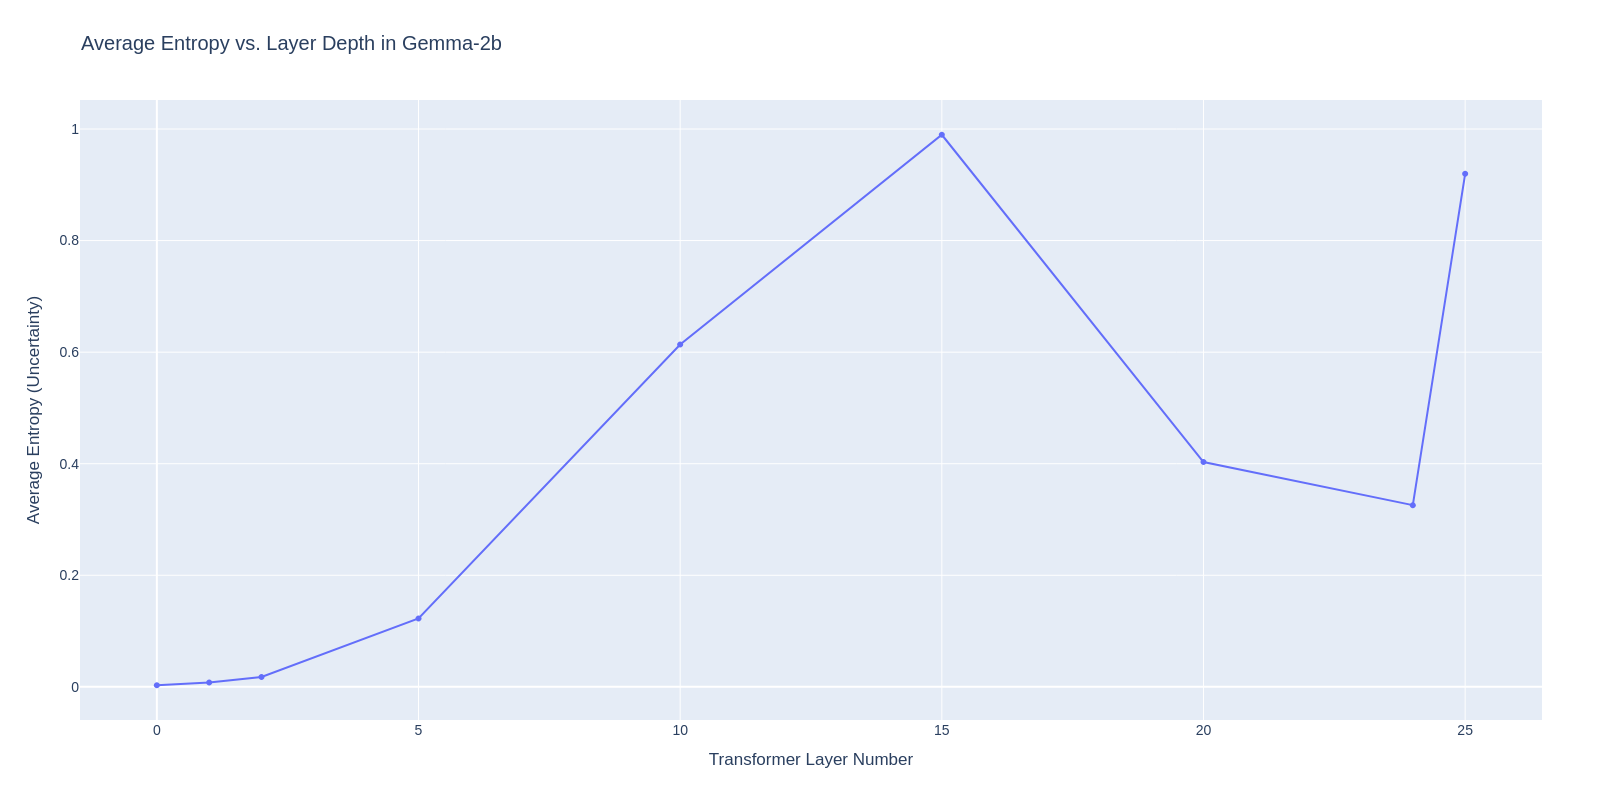

In [13]:
fig = px.line(
    x=x_labels, 
    y=y_values,
    title='Average Entropy vs. Layer Depth in Gemma-2b',
    labels={'x': 'Transformer Layer Number', 'y': 'Average Entropy'},
    markers=True  # Add markers to each data point for clarity
)

fig.update_layout(
    xaxis_title="Transformer Layer Number",
    yaxis_title="Average Entropy (Uncertainty)",
    font=dict(
        family="Arial, sans-serif",
        size=14
    ),
    width=600,
    height=800 
)

fig.show()

Some commentary here for certain about the early layers being really low and the last layer suddenly spiking back up. Though, the general inverted U-Shape is something I could convince myself of as being a reasonable outcome:
- early: we have no clue what we should be answering, so the model doesn't really know how to answer
- middle: where the "magic happens"  - model has some understanding of words, and has the wdiest range of next words
- final: "shift from what could this be" to "what should this be"

Final layer might be a result of preventing overconfidence/over calibration

# Top Tokens by Layer

In [25]:
df_layer_preds = pd.read_csv("./results/average_layer_predictions.csv")

In [26]:
df_layer_preds.head()

,layer,rank,token,avg_logit
0,0,1,.,92.408798
1,0,2,\n\n,90.205986
2,0,3,\n,87.247139
3,0,4,,86.141922
4,0,5,",",84.744537


In [28]:
df_layer_preds['token_with_logit'] = df_layer_preds.apply(
    lambda row: f"'{row['token']}' ({row['avg_logit']:.2f})",
    axis=1
)


full_pivot_df_with_logits = df_layer_preds.pivot_table(
    index='rank',
    columns='layer',
    values='token_with_logit', # Use the new formatted column here
    aggfunc='first'
)

In [29]:
full_pivot_df_with_logits

layer,0,1,2,5,10,15,20,24,25
rank,,,,,,,,,
1,'.' (92.41),'<bos>' (144.73),'<bos>' (57.75),'<bos>' (81.02),' Theſe' (45.88),' ſeveral' (87.08),' very' (134.82),"',' (244.80)",' ' (265.90)
2,'\n\n' (90.21),''' (72.30),' it' (34.21),' and' (43.90),'достатки' (45.41),' Theſe' (86.35),' really' (117.16),' the' (230.71),"',' (247.35)"
3,'\n' (87.25),"',' (68.63)",' that' (33.93),' that' (43.33),' ſhe' (45.27),' myſelf' (86.13),' just' (115.49),' ' (228.74),' the' (223.79)
4,' ' (86.14),' ' (66.42),' and' (33.51),' to' (42.56),' whoſe' (44.95),' pleaſure' (83.56),' all' (112.88),' ' (226.64),' and' (222.37)
5,"',' (84.74)",'.' (66.09),' to' (33.37),' in' (37.55),' myſelf' (43.81),' Efq' (82.39),' that' (111.62),' and' (223.85),' a' (211.06)
6,''' (77.90),'’' (62.62),' the' (32.78),' the' (36.90),' becauſe' (42.78),' ſhe' (81.95),' one' (110.44),' a' (206.23),' ' (204.69)
7,' (' (75.14),'\n' (62.22),' in' (32.64),' on' (36.04),' himſelf' (42.27),' whoſe' (80.85),' like' (109.73),' to' (198.28),'.' (194.17)
8,' to' (72.04),'(' (60.63),' enough' (30.21),' with' (35.71),' automatiques' (41.66),'достатки' (80.66),' to' (107.47),' in' (197.81),' to' (190.59)
9,' and' (71.86),'-' (60.54),' of' (30.14),' from' (33.86),' ſeveral' (41.50),' Jefus' (80.21),' little' (105.25),'.' (195.00),' in' (176.93)


In [30]:
top_predictions_df = df_layer_preds[df_layer_preds['rank'] == 1].sort_values('layer')

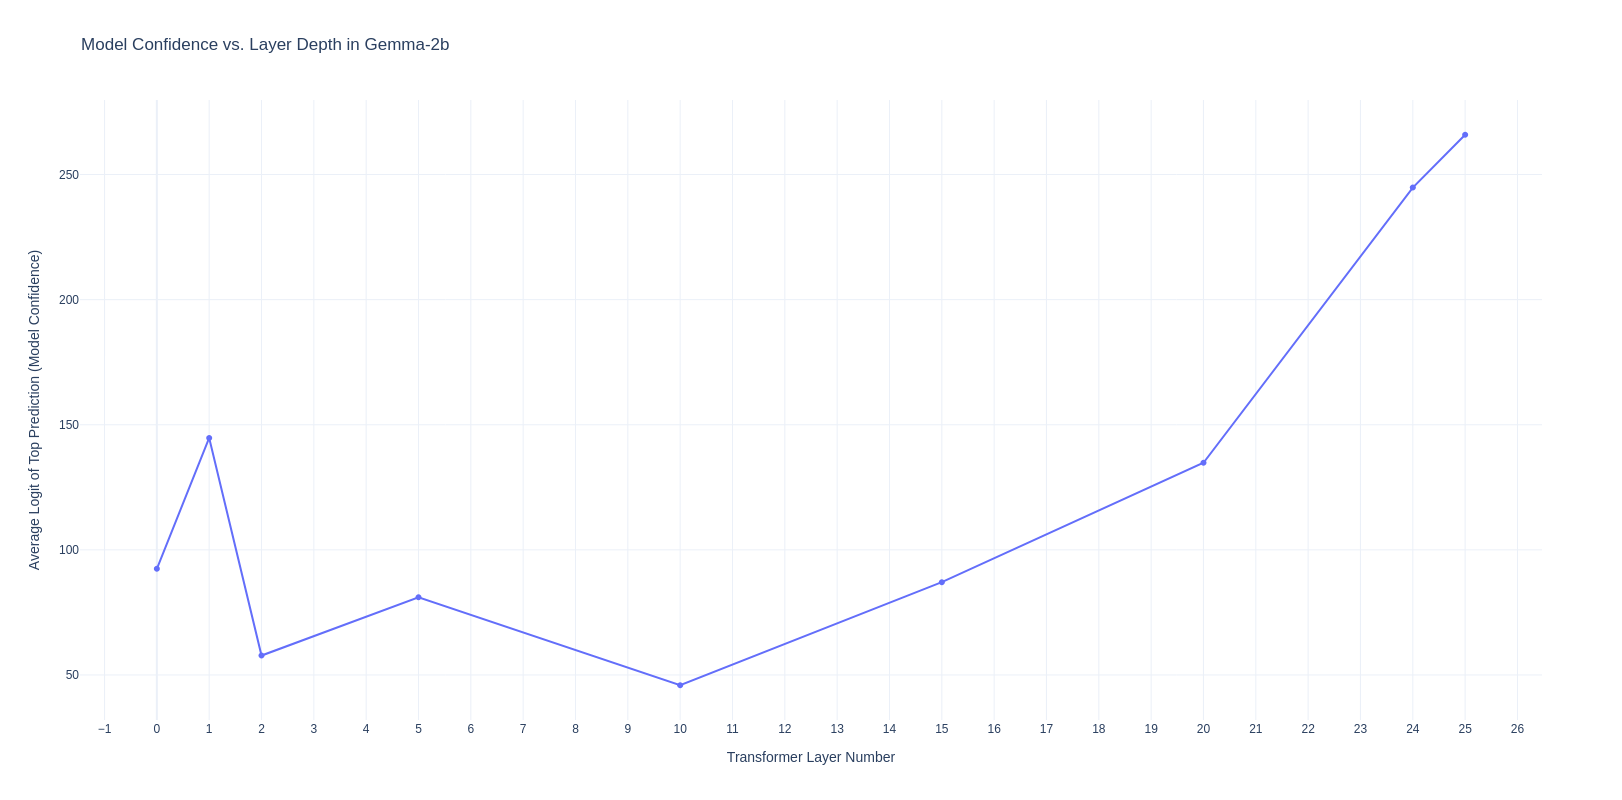

In [32]:
fig = px.line(
    top_predictions_df,
    x='layer',
    y='avg_logit',
    markers=True,
    title="Model Confidence vs. Layer Depth in Gemma-2b",
    labels={
        "layer": "Transformer Layer Number",
        "avg_logit": "Average Logit of Top Prediction (Model Confidence)"
    }
)

fig.update_layout(
    xaxis=dict(tickmode='linear'),
    template='plotly_white',
    width=600,
    height=800
)

fig.show()

# Activations Analysis

In [16]:
df_act = pd.read_csv("./results/neuron_rankings.csv")

In [19]:
df_act.head(25)

,score,layer,neuron,sparsity,importance
0,0.499938,0,1827,0.999876,0.500000
1,0.478912,3,915,0.992724,0.482422
2,0.460252,25,8830,0.924114,0.498047
3,0.459580,12,4417,0.891306,0.515625
4,0.452533,12,4101,0.877639,0.515625
5,0.448618,10,8795,0.994339,0.451172
6,0.446004,9,6860,0.928270,0.480469
7,0.443359,6,2643,1.000000,0.443359
8,0.443212,1,4401,0.937705,0.472656
9,0.440788,13,2840,0.868014,0.507812
